# Read dataset

In [28]:
import pandas as pd

# Dataset Link: https://www.kaggle.com/datasets/sadmansakib7/ecg-arrhythmia-classification-dataset/data
# Reading MIT-BIH Arrhythmia Dataset as an example
data= pd.read_csv('./Dataset/MIT-BIH Arrhythmia Database.csv') 
print(data.shape)
data.head()

(100689, 34)


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [29]:
data.isnull().sum()

record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

# Split the data into features and class labels

In [30]:
x_data = data.iloc[:, 2:].copy()
y_label = data[['type']].copy()
y_label.value_counts()

type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64

# Visualization

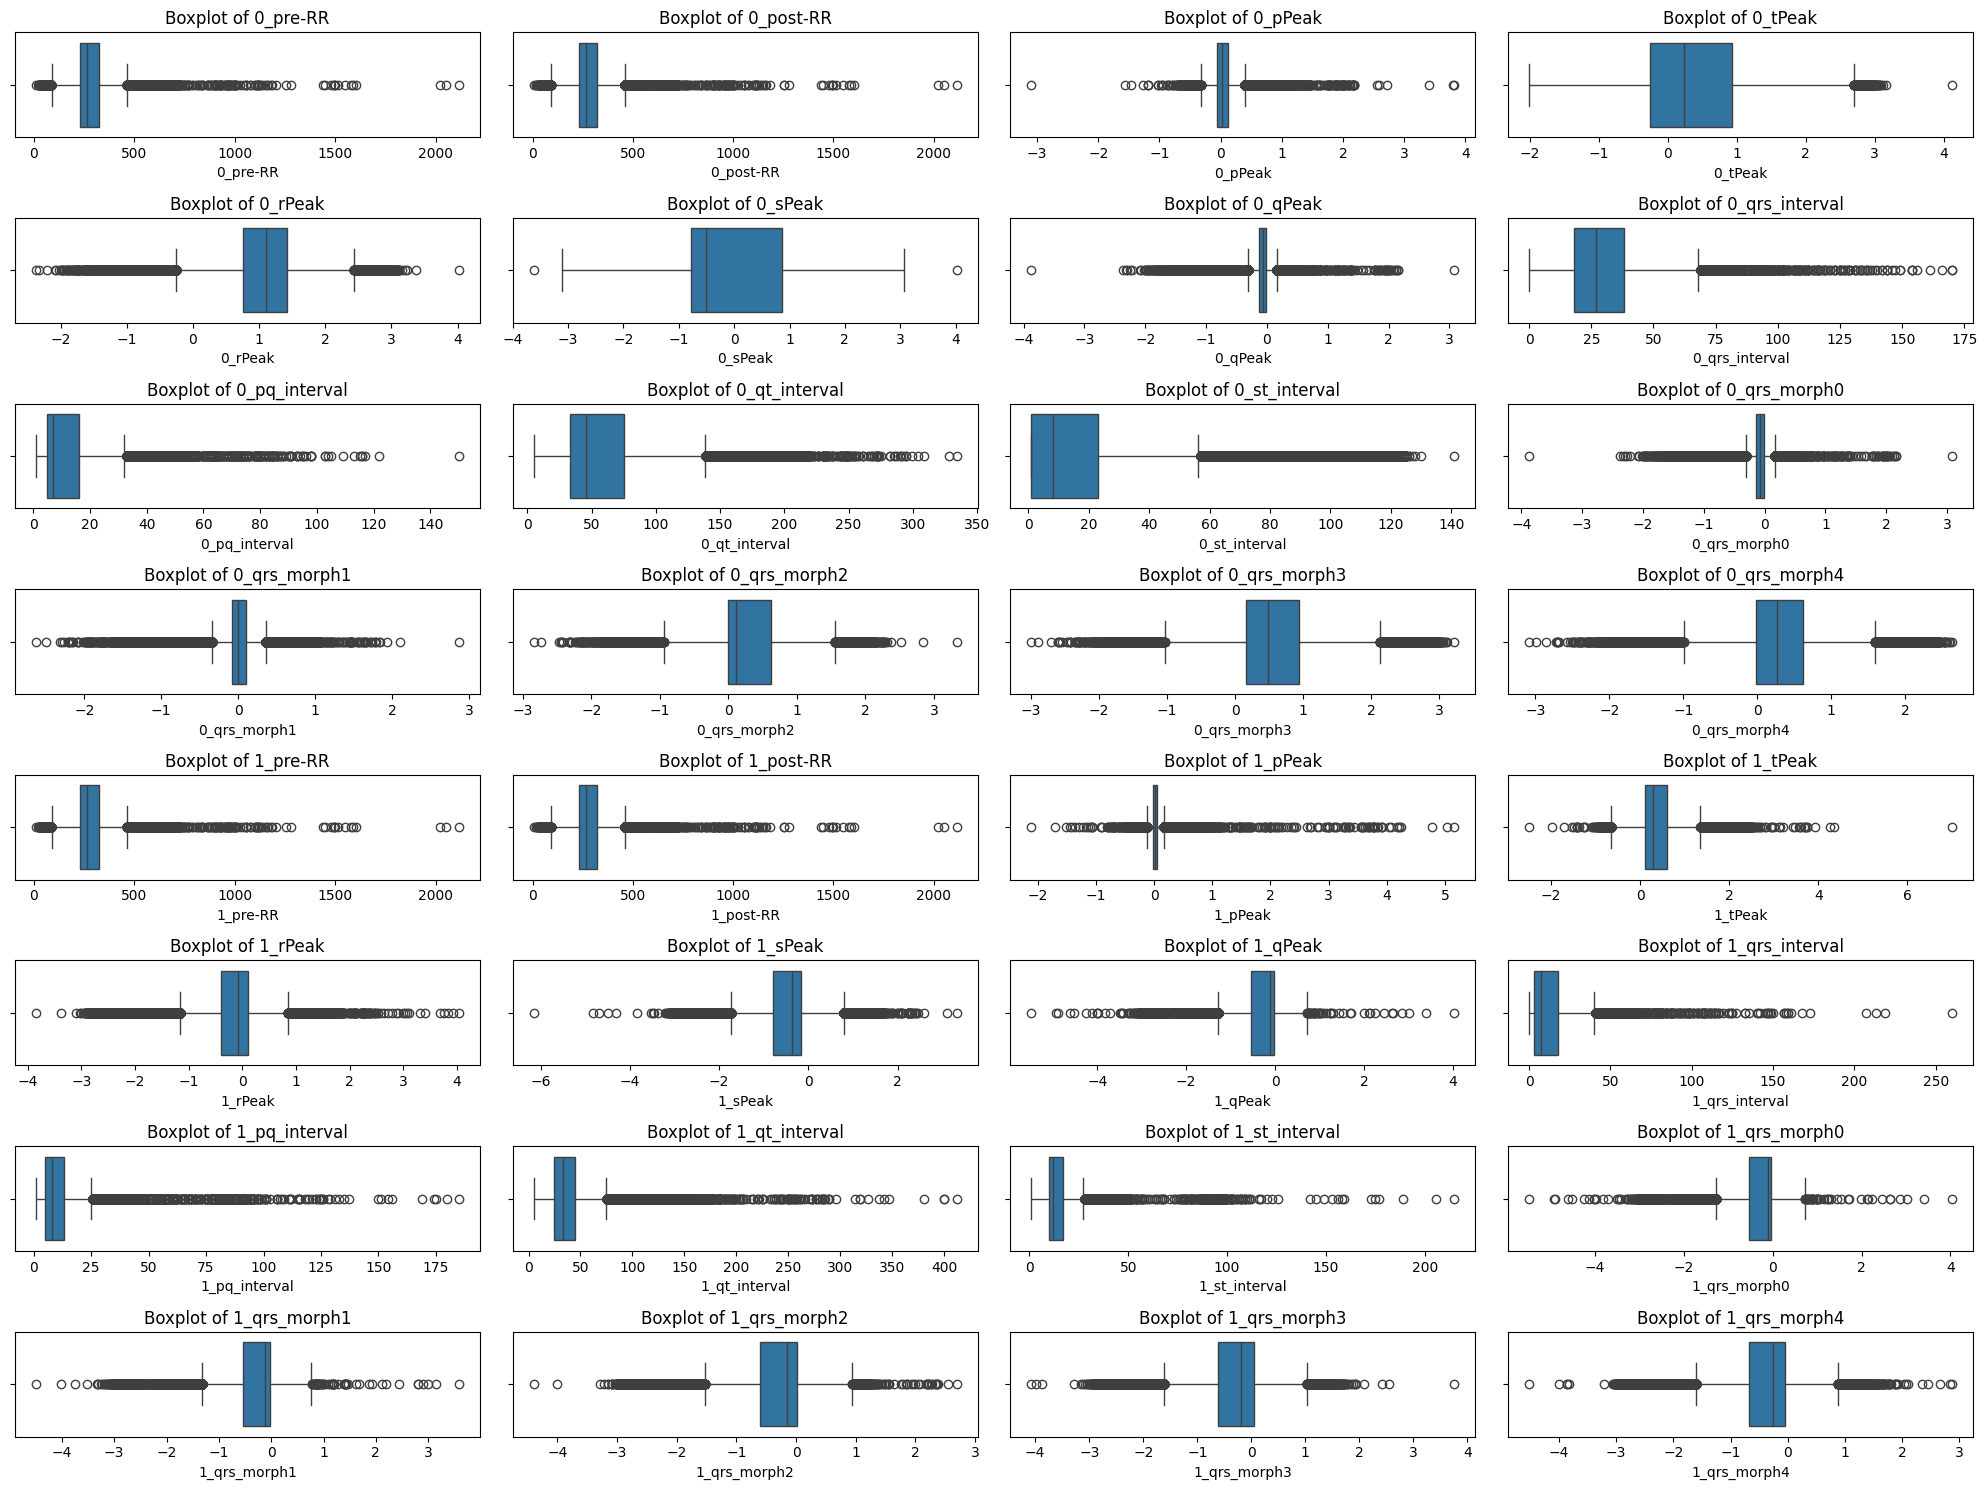

In [31]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i, col in enumerate(x_data, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(x=x_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Noramlization

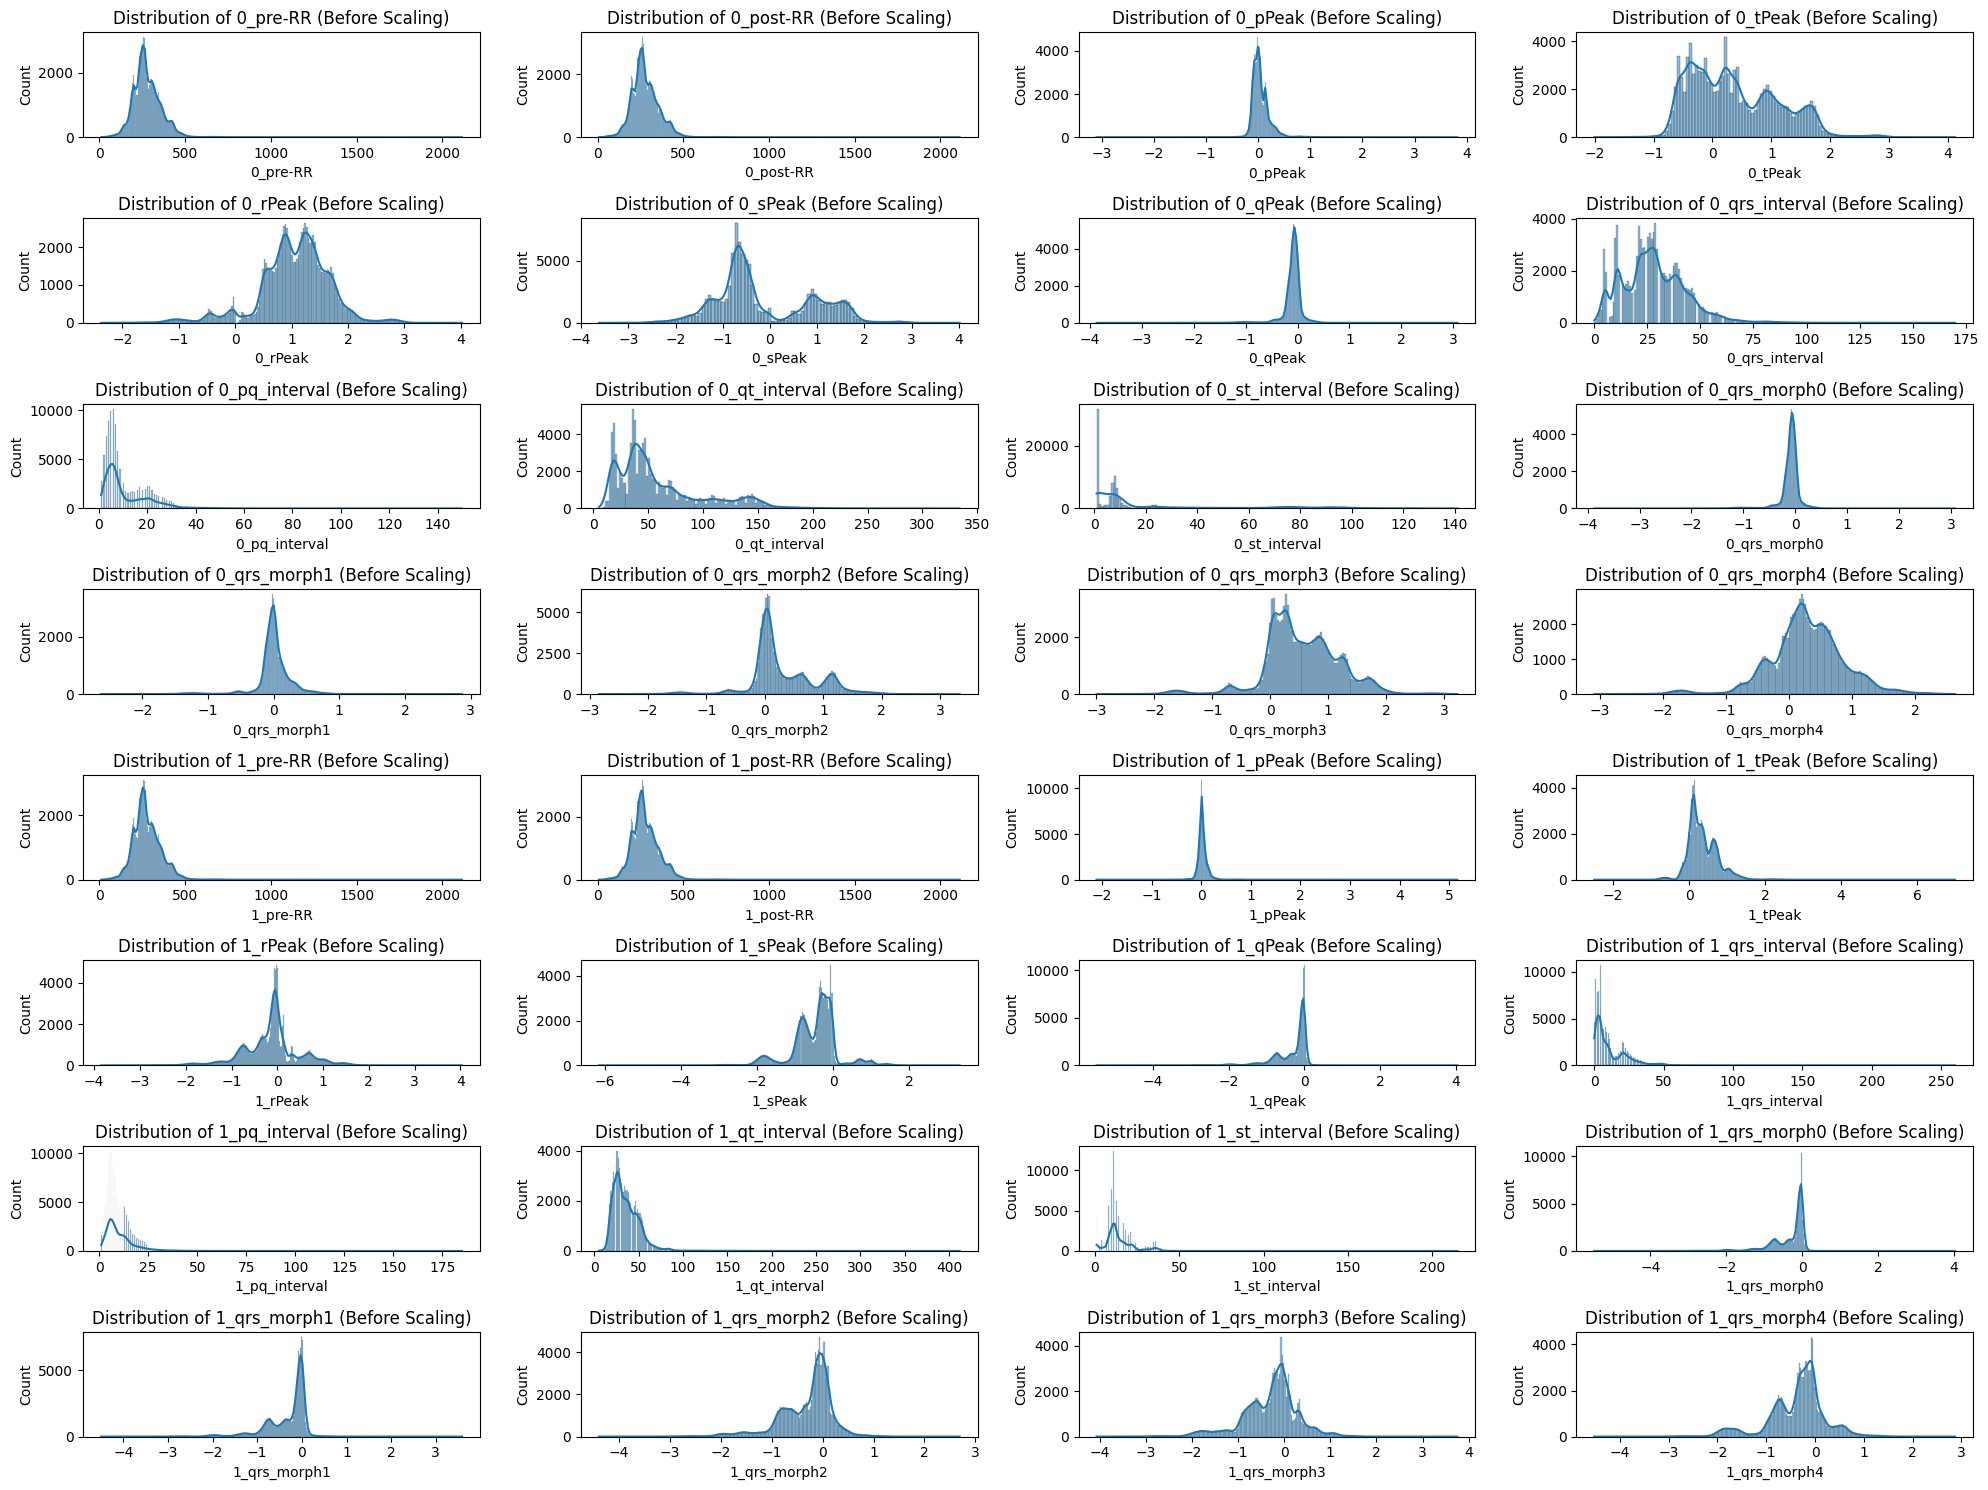

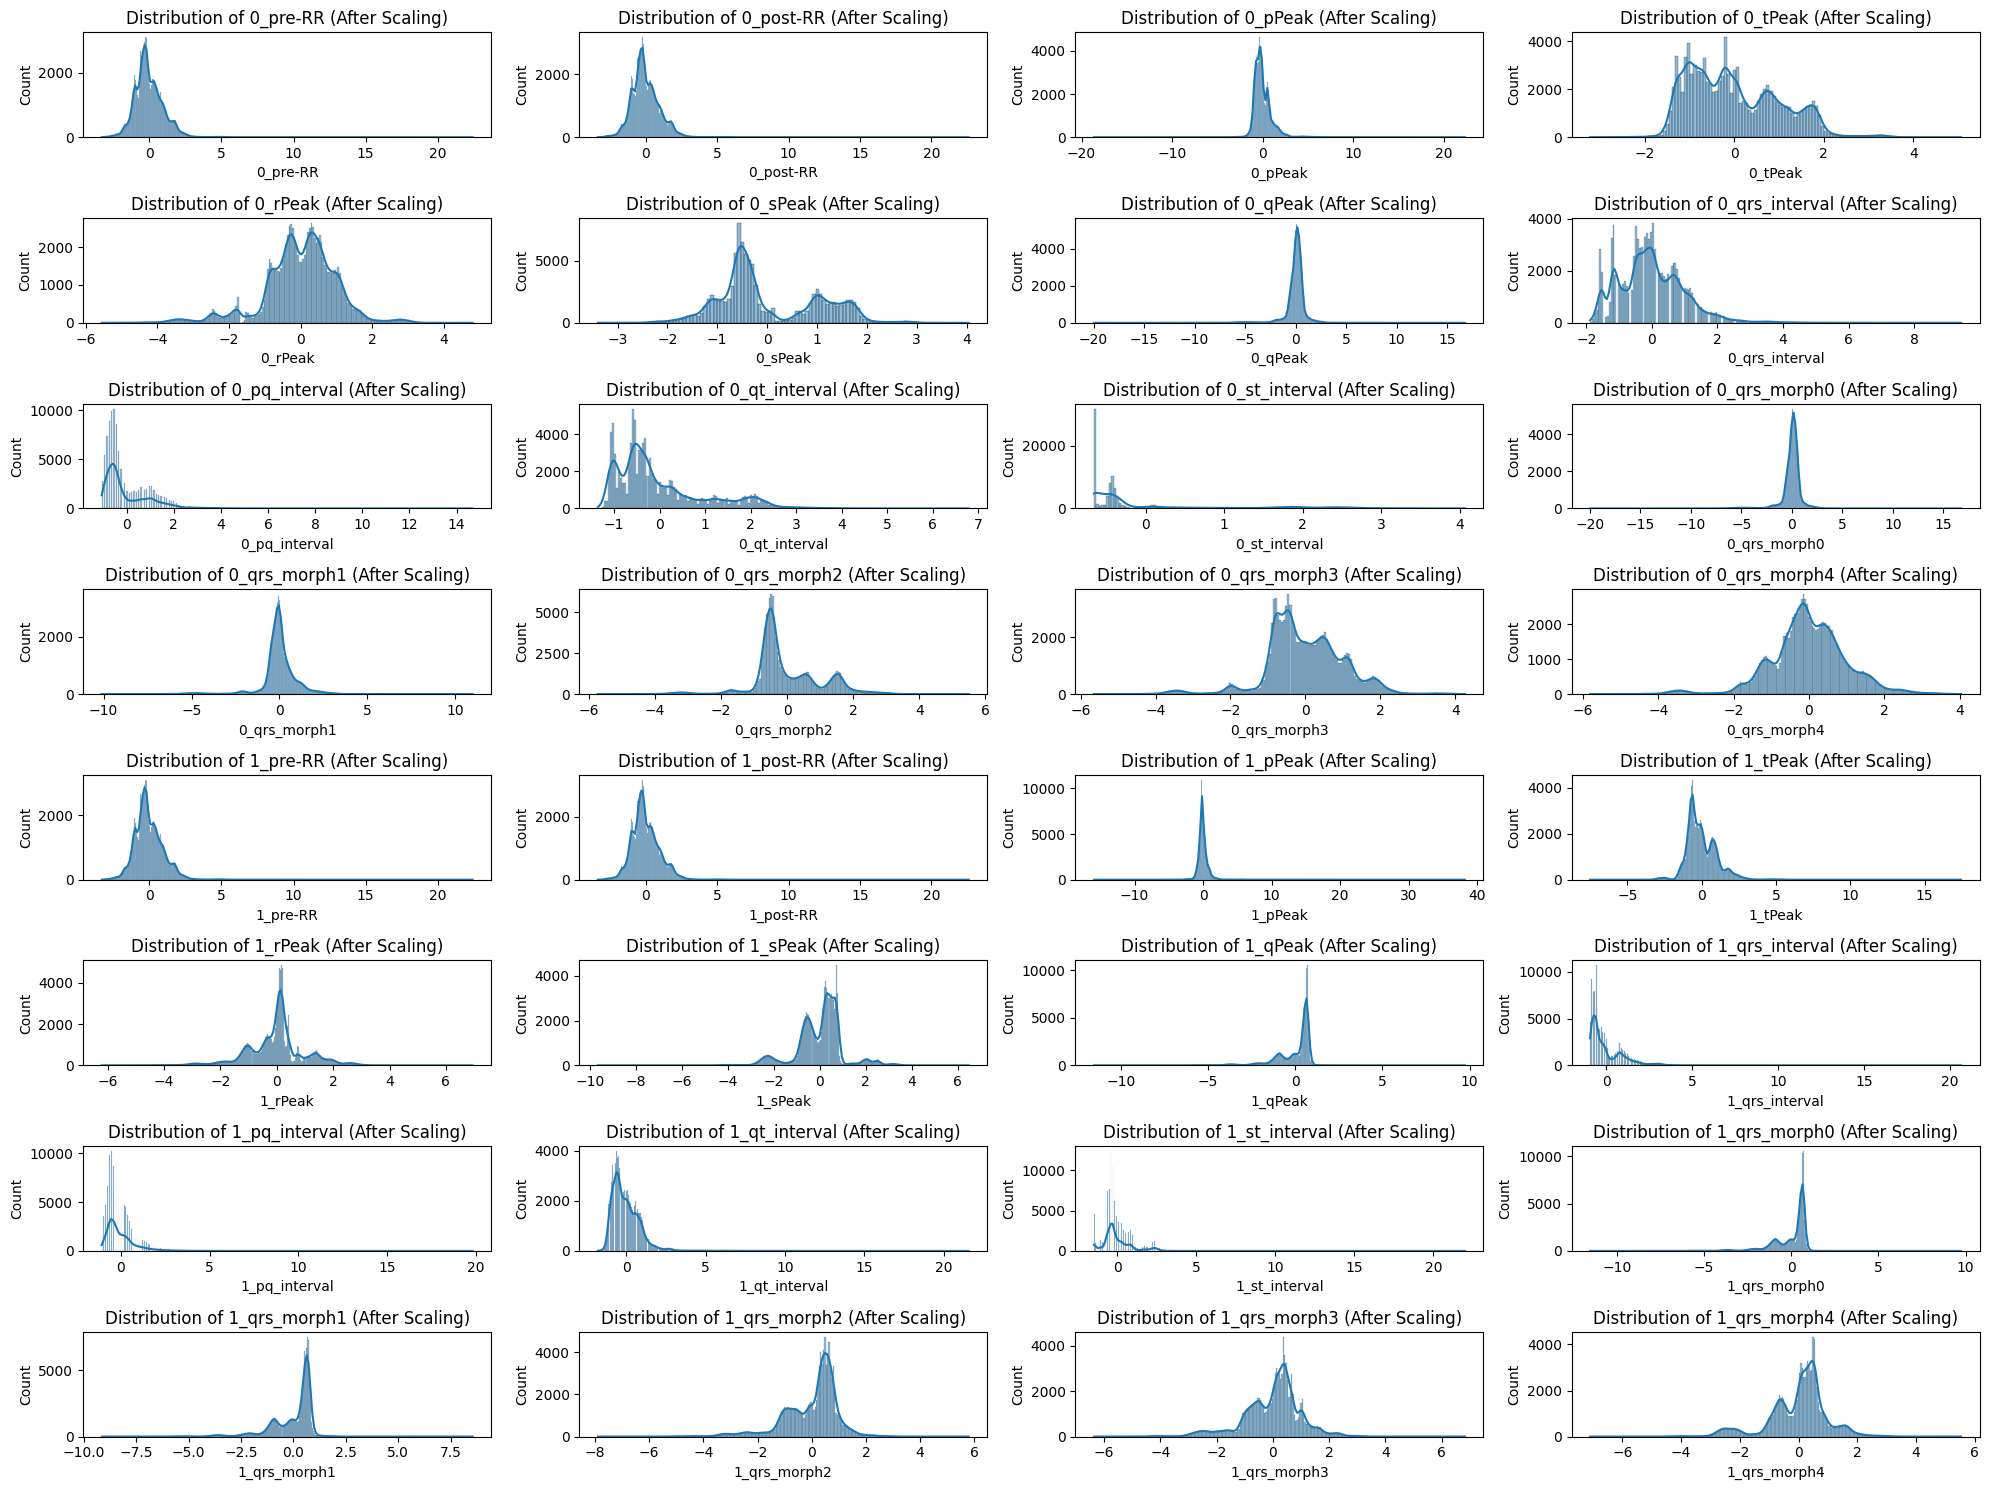

In [32]:
from sklearn.preprocessing import StandardScaler

numeric_cols = x_data.select_dtypes(include='number').columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 4, i)
    sns.histplot(x=x_data[col], kde=True)
    plt.title(f'Distribution of {col} (Before Scaling)')
plt.tight_layout()
plt.show()

scaler = StandardScaler()
x_data[numeric_cols] = scaler.fit_transform(x_data[numeric_cols])

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 4, i)
    sns.histplot(x=x_data[col], kde=True)
    plt.title(f'Distribution of {col} (After Scaling)')
plt.tight_layout()
plt.show()


# Transform multi-class labels into binary-class (arrhythmia: 1 and normal: 0)

In [33]:
y_label = data['type'].map({'VEB': 1, 'SVEB': 1, 'F': 1, 'Q': 1, 'N': 0}).astype('int64')

y_label.value_counts()

type
0    90083
1    10606
Name: count, dtype: int64

# Model Training

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import time
import warnings

warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.3, random_state=101)

rf_model = RandomForestClassifier()
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)  

print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count: {X_train_pca.shape[1]}")

rf_model_pca = RandomForestClassifier()
start_time = time.time()
rf_model_pca.fit(X_train_pca, y_train)
rf_pca_train_time = time.time() - start_time

# Trainig Accuracy
print(f'Accuracy of Random Forest model for the train data without PCA: {rf_model.score(X_train, y_train):.3f}', end='\n')
print(f'Accuracy of Random Forest model for the train data with PCA: {rf_model_pca.score(X_train_pca, y_train):.3f}', end='\n')

# Training Time
print(f"Training time without PCA {rf_train_time:.3f}")
print(f"Training time with PCA {rf_pca_train_time:.3f}")

Original feature count: 32
Reduced feature count: 32
Accuracy of Random Forest model for the train data without PCA: 1.000
Accuracy of Random Forest model for the train data without PCA: 1.000
Accuracy of Random Forest model for the train data with PCA: 1.000
Training time without PCA 45.847
Training time with PCA 69.307
Accuracy of Random Forest model for the train data with PCA: 1.000
Training time without PCA 45.847
Training time with PCA 69.307


# Model Testing

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Without PCA
start_time = time.time()
y_pred_rf = rf_model.predict(X_test)
rf_pred_time = time.time() - start_time
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# With PCA
start_time = time.time()
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
rf_pca_pred_time = time.time() - start_time
y_proba_rf_pca = rf_model_pca.predict_proba(X_test_pca)[:, 1]

def compute_metrics(y_true, y_pred, y_proba, time):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0),
        'auc': roc_auc_score(y_true, y_proba) if len(np.unique(y_true)) == 2 else np.nan,
        'prediction_time': time
    }

metrics_rf = compute_metrics(y_test, y_pred_rf, y_proba_rf, rf_pred_time)
metrics_rf_pca = compute_metrics(y_test, y_pred_rf_pca, y_proba_rf_pca, rf_pca_pred_time)

results = pd.DataFrame([metrics_rf_pca, metrics_rf], index=['With PCA', 'Without PCA'])
print('Test metrics (rows = model):')
print(results.transpose())

Test metrics (rows = model):
                 With PCA  Without PCA
accuracy         0.972722     0.989605
precision        0.953470     0.975949
recall           0.774008     0.922215
f1               0.854417     0.948321
auc              0.986980     0.997910
prediction_time  0.257707     0.233961


# Visualize Models Metrices

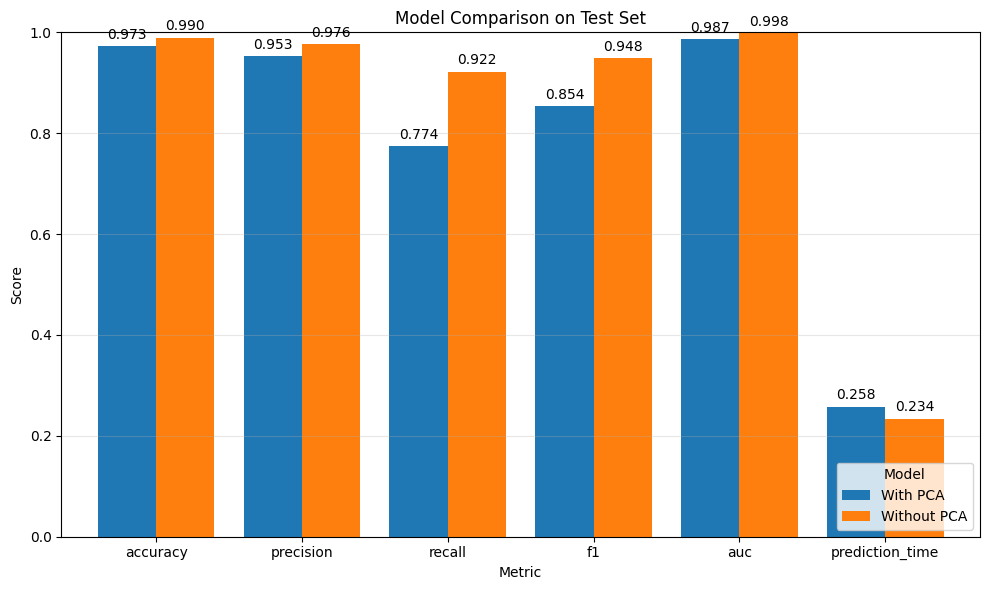

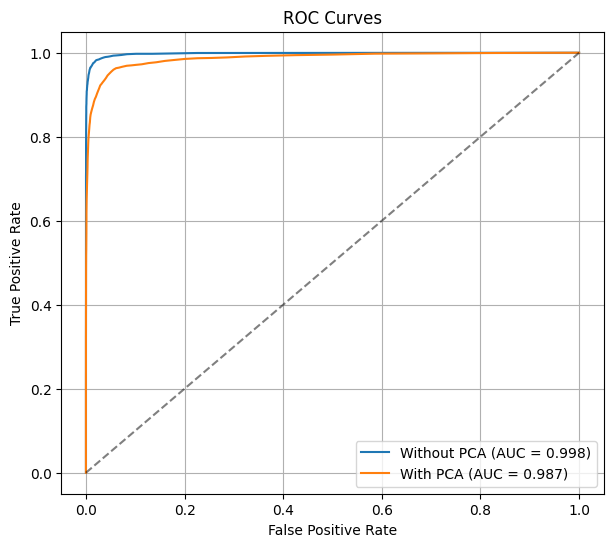

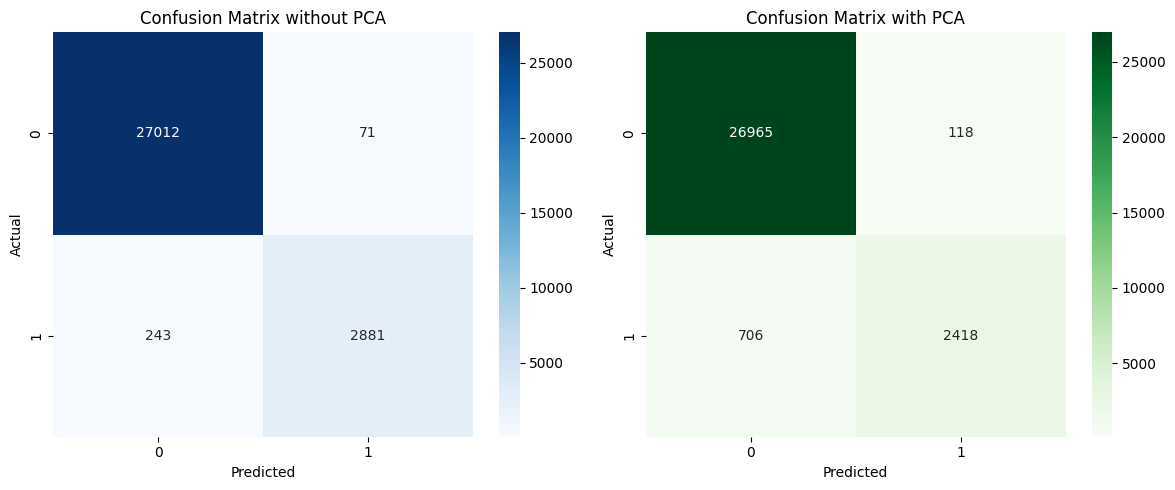

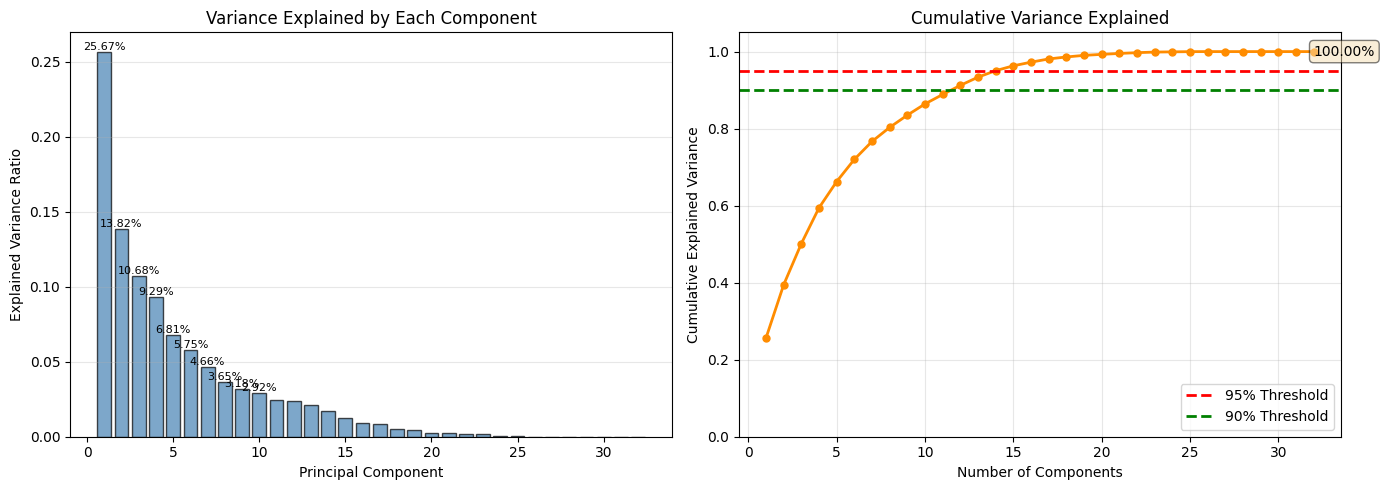

In [ ]:
from sklearn.metrics import roc_curve, confusion_matrix

def plot_metrics_comparison(results):
    """Plots a bar chart comparing metrics across models."""
    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'auc', 'prediction_time']
    
    results_plot = results[metrics_to_plot]
    
    ax = results_plot.T.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title('Model Comparison on Test Set')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Model', loc='lower right')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=0)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)
    
    plt.tight_layout()
    plt.show()
    

def plot_roc_curves(y_test, y_proba_rf, y_proba_rf_pca, metrics_rf, metrics_rf_pca):
    """Plots ROC curves for Random Forest with and without PCA."""
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
    fpr_rf_pca, tpr_rf_pca, _ = roc_curve(y_test, y_proba_rf_pca)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr_rf, tpr_rf, label=f'Without PCA (AUC = {metrics_rf.get("auc", np.nan):.3f})')
    plt.plot(fpr_rf_pca, tpr_rf_pca, label=f'With PCA (AUC = {metrics_rf_pca.get("auc", np.nan):.3f})')
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

def plot_confusion_matrices(y_test, y_pred_rf, y_pred_rf_pca):
    """Plots confusion matrices for Random Forest with and without PCA."""
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    cm_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)

    plt.figure(figsize=(12, 5))
    
    # Without PCA
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix without PCA')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # With PCA
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_rf_pca, annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix with PCA')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

def plot_variance_explained(pca):
    """
    Visualizes the explained variance of PCA components.
    
    Parameters:
    -----------
    pca : PCA object
        Fitted PCA object
    """
    variance_explained = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_explained)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: Individual variance explained by each component
    ax1.bar(range(1, len(variance_explained) + 1), variance_explained, 
            alpha=0.7, color='steelblue', edgecolor='black')
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.set_title('Variance Explained by Each Component')
    ax1.grid(axis='y', alpha=0.3)
    
    # Add percentage labels on top of bars (for first 10 components)
    for i, v in enumerate(variance_explained[:min(10, len(variance_explained))]):
        ax1.text(i + 1, v, f'{v:.2%}', ha='center', va='bottom', fontsize=8)
    
    # Plot 2: Cumulative variance explained
    ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
             marker='o', linestyle='-', color='darkorange', linewidth=2, markersize=5)
    ax2.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% Threshold')
    ax2.axhline(y=0.90, color='green', linestyle='--', linewidth=2, label='90% Threshold')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Cumulative Explained Variance')
    ax2.set_title('Cumulative Variance Explained')
    ax2.legend(loc='lower right')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, 1.05])
    
    # Add text annotation for total variance
    total_var = cumulative_variance[-1]
    ax2.text(len(cumulative_variance), total_var, 
             f'{total_var:.2%}', ha='left', va='center', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()    

# Execute the visualization functions
plot_metrics_comparison(results)
plot_roc_curves(y_test, y_proba_rf,  y_proba_rf_pca, metrics_rf, metrics_rf_pca)
plot_confusion_matrices(y_test, y_pred_rf, y_pred_rf_pca)
plot_variance_explained(pca)



# PCA Parameters change

### 6.1 Experimenting with n_components

In [ ]:
# Experiment with different n_components values
n_components_list = [5, 10, 15, 20, 25]
results_n_components = []

print("Experimenting with different n_components values...\n")

for n_comp in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_comp, random_state=42)
    X_train_temp = pca.fit_transform(X_train)
    X_test_temp = pca.transform(X_test)
    
    # Train RF
    rf = RandomForestClassifier()
    
    start_time = time.time()
    rf.fit(X_train_temp, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = rf.predict(X_test_temp)
    pred_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    variance_explained = sum(pca.explained_variance_ratio_)
    
    results_n_components.append({
        'n_components': n_comp,
        'variance_explained': variance_explained,
        'accuracy': accuracy,
        'train_time': train_time,
        'pred_time': pred_time
    })
    
    print(f"n_components={n_comp:3d} | Variance: {variance_explained:.4f} | Accuracy: {accuracy:.4f} | Train: {train_time:.4f}s | Predict: {pred_time:.4f}s")

results_df = pd.DataFrame(results_n_components)
print("\n" + "="*80)
print(results_df.to_string(index=False))

Experimenting with different n_components values...

n_components=  5 | Variance: 0.6613 | Accuracy: 0.9700 | Train: 21.8197s | Predict: 0.2807s
n_components=  5 | Variance: 0.6613 | Accuracy: 0.9700 | Train: 21.8197s | Predict: 0.2807s
n_components= 10 | Variance: 0.8618 | Accuracy: 0.9823 | Train: 34.8499s | Predict: 0.2436s
n_components= 10 | Variance: 0.8618 | Accuracy: 0.9823 | Train: 34.8499s | Predict: 0.2436s
n_components= 15 | Variance: 0.9634 | Accuracy: 0.9844 | Train: 37.6284s | Predict: 0.2581s
n_components= 15 | Variance: 0.9634 | Accuracy: 0.9844 | Train: 37.6284s | Predict: 0.2581s
n_components= 20 | Variance: 0.9928 | Accuracy: 0.9845 | Train: 52.3081s | Predict: 0.2477s
n_components= 20 | Variance: 0.9928 | Accuracy: 0.9845 | Train: 52.3081s | Predict: 0.2477s
n_components= 25 | Variance: 0.9999 | Accuracy: 0.9848 | Train: 68.7940s | Predict: 0.2575s

 n_components  variance_explained  accuracy  train_time  pred_time
            5            0.661251  0.970040   21.81

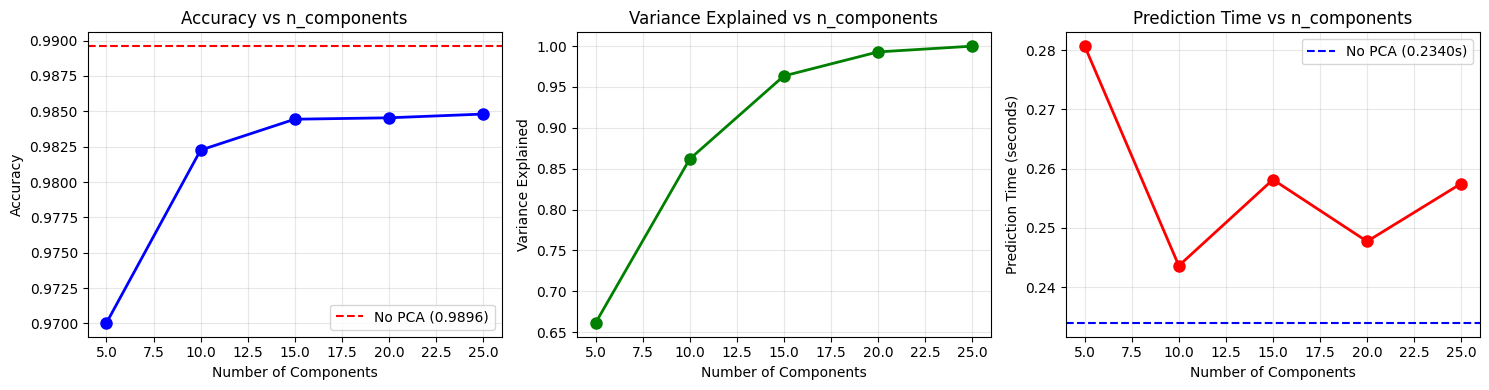

In [38]:
# Visualize n_components experiment results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Accuracy vs n_components
axes[0].plot(results_df['n_components'], results_df['accuracy'], 'bo-', linewidth=2, markersize=8)
axes[0].axhline(y=metrics_rf['accuracy'], color='r', linestyle='--', label=f'No PCA ({metrics_rf['accuracy']:.4f})')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy vs n_components')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Variance Explained vs n_components
axes[1].plot(results_df['n_components'], results_df['variance_explained'], 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Variance Explained')
axes[1].set_title('Variance Explained vs n_components')
axes[1].grid(True, alpha=0.3)

# Training Time vs n_components
axes[2].plot(results_df['n_components'], results_df['pred_time'], 'ro-', linewidth=2, markersize=8)
axes[2].axhline(y=metrics_rf['prediction_time'], color='b', linestyle='--', label=f'No PCA ({metrics_rf['prediction_time']:.4f}s)')
axes[2].set_xlabel('Number of Components')
axes[2].set_ylabel('Prediction Time (seconds)')
axes[2].set_title('Prediction Time vs n_components')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Experimenting with svd_solver

In [ ]:
# Experiment with different svd_solver options
svd_solvers = ['auto', 'full', 'randomized']
n_comp = 20  # Fixed number of components for comparison
results_svd = []

print(f"Experimenting with different svd_solver options (n_components={n_comp})...\n")

for solver in svd_solvers:
    # Apply PCA
    pca = PCA(n_components=n_comp, svd_solver=solver, random_state=42)
    
    start_time = time.time()
    X_train_temp = pca.fit_transform(X_train)
    X_test_temp = pca.transform(X_test)
    pca_time = time.time() - start_time
    
    # Train RF
    knn = RandomForestClassifier()
    knn.fit(X_train_temp, y_train)
    y_pred = knn.predict(X_test_temp)
    
    accuracy = accuracy_score(y_test, y_pred)
    variance_explained = sum(pca.explained_variance_ratio_)
    
    results_svd.append({
        'svd_solver': solver,
        'pca_time': pca_time,
        'variance_explained': variance_explained,
        'accuracy': accuracy
    })
    
    print(f"svd_solver='{solver:10s}' | PCA Time: {pca_time:.4f}s | Variance: {variance_explained:.4f} | Accuracy: {accuracy:.4f}")

print("\n" + "="*80)
print("\nObservations:")
print("- 'auto': Automatically chooses the best solver based on data characteristics")
print("- 'full': Uses full SVD, best for small datasets or when all components are needed")
print("- 'randomized': Uses randomized SVD, faster for large datasets with many features")

Experimenting with different svd_solver options (n_components=20)...

svd_solver='auto      ' | PCA Time: 0.0348s | Variance: 0.9928 | Accuracy: 0.9848
svd_solver='auto      ' | PCA Time: 0.0348s | Variance: 0.9928 | Accuracy: 0.9848
svd_solver='full      ' | PCA Time: 0.0719s | Variance: 0.9928 | Accuracy: 0.9846
svd_solver='full      ' | PCA Time: 0.0719s | Variance: 0.9928 | Accuracy: 0.9846
svd_solver='randomized' | PCA Time: 0.2129s | Variance: 0.9928 | Accuracy: 0.9851


Observations:
- 'auto': Automatically chooses the best solver based on data characteristics
- 'full': Uses full SVD, best for small datasets or when all components are needed
- 'randomized': Uses randomized SVD, faster for large datasets with many features
svd_solver='randomized' | PCA Time: 0.2129s | Variance: 0.9928 | Accuracy: 0.9851


Observations:
- 'auto': Automatically chooses the best solver based on data characteristics
- 'full': Uses full SVD, best for small datasets or when all components are needed
- 

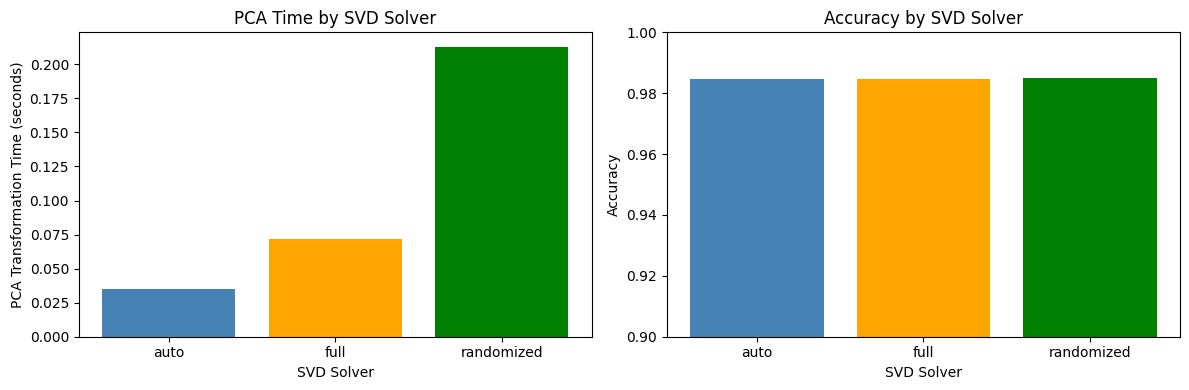

In [40]:
# Visualize svd_solver results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

svd_df = pd.DataFrame(results_svd)

# PCA Time comparison
colors = ['steelblue', 'orange', 'green']
axes[0].bar(svd_df['svd_solver'], svd_df['pca_time'], color=colors)
axes[0].set_xlabel('SVD Solver')
axes[0].set_ylabel('PCA Transformation Time (seconds)')
axes[0].set_title('PCA Time by SVD Solver')

# Accuracy comparison
axes[1].bar(svd_df['svd_solver'], svd_df['accuracy'], color=colors)
axes[1].set_xlabel('SVD Solver')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy by SVD Solver')
axes[1].set_ylim([0.9, 1.0])

plt.tight_layout()
plt.show()

### 6.3 Experimenting with whiten Parameter

In [41]:
# Experiment with whiten parameter
whiten_options = [False, True]
n_comp = 20
results_whiten = []

print(f"Experimenting with whiten parameter (n_components={n_comp})...\n")

for whiten in whiten_options:
    # Apply PCA
    pca = PCA(n_components=n_comp, whiten=whiten, random_state=42)
    X_train_temp = pca.fit_transform(X_train)
    X_test_temp = pca.transform(X_test)
    
    # Check variance of components
    component_variance = np.var(X_train_temp, axis=0)
    
    # Train KNN
    knn = RandomForestClassifier()
    knn.fit(X_train_temp, y_train)
    y_pred = knn.predict(X_test_temp)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results_whiten.append({
        'whiten': whiten,
        'accuracy': accuracy,
        'mean_component_variance': np.mean(component_variance),
        'std_component_variance': np.std(component_variance)
    })
    
    print(f"whiten={str(whiten):5s} | Accuracy: {accuracy:.4f} | Mean Variance: {np.mean(component_variance):.4f} | Std Variance: {np.std(component_variance):.4f}")

print("\n" + "="*80)
print("\nObservations:")
print("- whiten=False: Components have different variances (based on explained variance)")
print("- whiten=True: All components are scaled to have unit variance")
print("- Whitening can help algorithms that are sensitive to feature scales")

Experimenting with whiten parameter (n_components=20)...

whiten=False | Accuracy: 0.9848 | Mean Variance: 1.5944 | Std Variance: 1.9094
whiten=False | Accuracy: 0.9848 | Mean Variance: 1.5944 | Std Variance: 1.9094
whiten=True  | Accuracy: 0.9844 | Mean Variance: 1.0000 | Std Variance: 0.0000


Observations:
- whiten=False: Components have different variances (based on explained variance)
- whiten=True: All components are scaled to have unit variance
- Whitening can help algorithms that are sensitive to feature scales
whiten=True  | Accuracy: 0.9844 | Mean Variance: 1.0000 | Std Variance: 0.0000


Observations:
- whiten=False: Components have different variances (based on explained variance)
- whiten=True: All components are scaled to have unit variance
- Whitening can help algorithms that are sensitive to feature scales


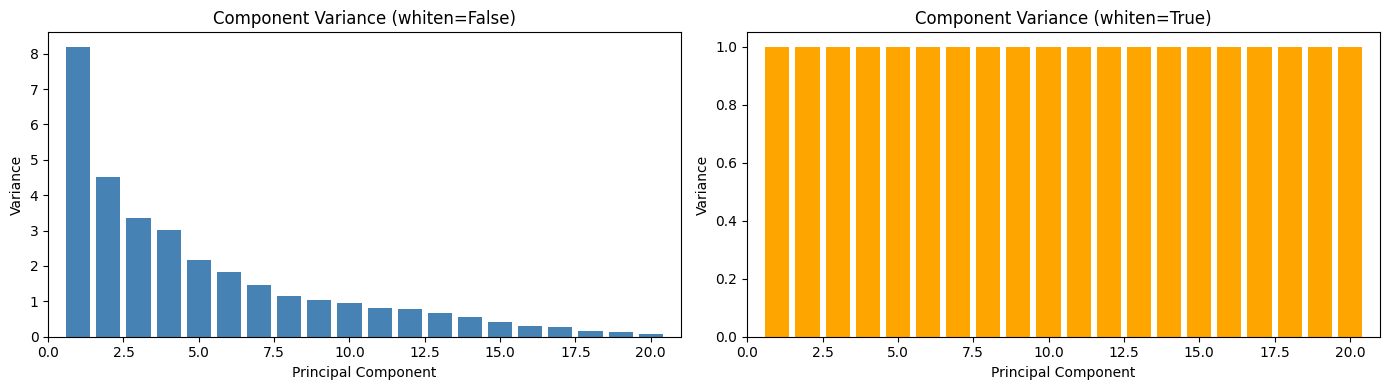

In [47]:
# Visualize component variance distribution with and without whitening
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

for idx, whiten in enumerate([False, True]):
    pca = PCA(n_components=20, whiten=whiten, random_state=42)
    X_train_temp = pca.fit_transform(X_train)
    component_variance = np.var(X_train_temp, axis=0)
    
    axes[idx].bar(range(1, 21), component_variance, color='steelblue' if not whiten else 'orange')
    axes[idx].set_xlabel('Principal Component')
    axes[idx].set_ylabel('Variance')
    axes[idx].set_title(f'Component Variance (whiten={whiten})')
    axes[idx].set_xlim([0, 21])

plt.tight_layout()
plt.show()

# 2D and 3D PCA Visualization

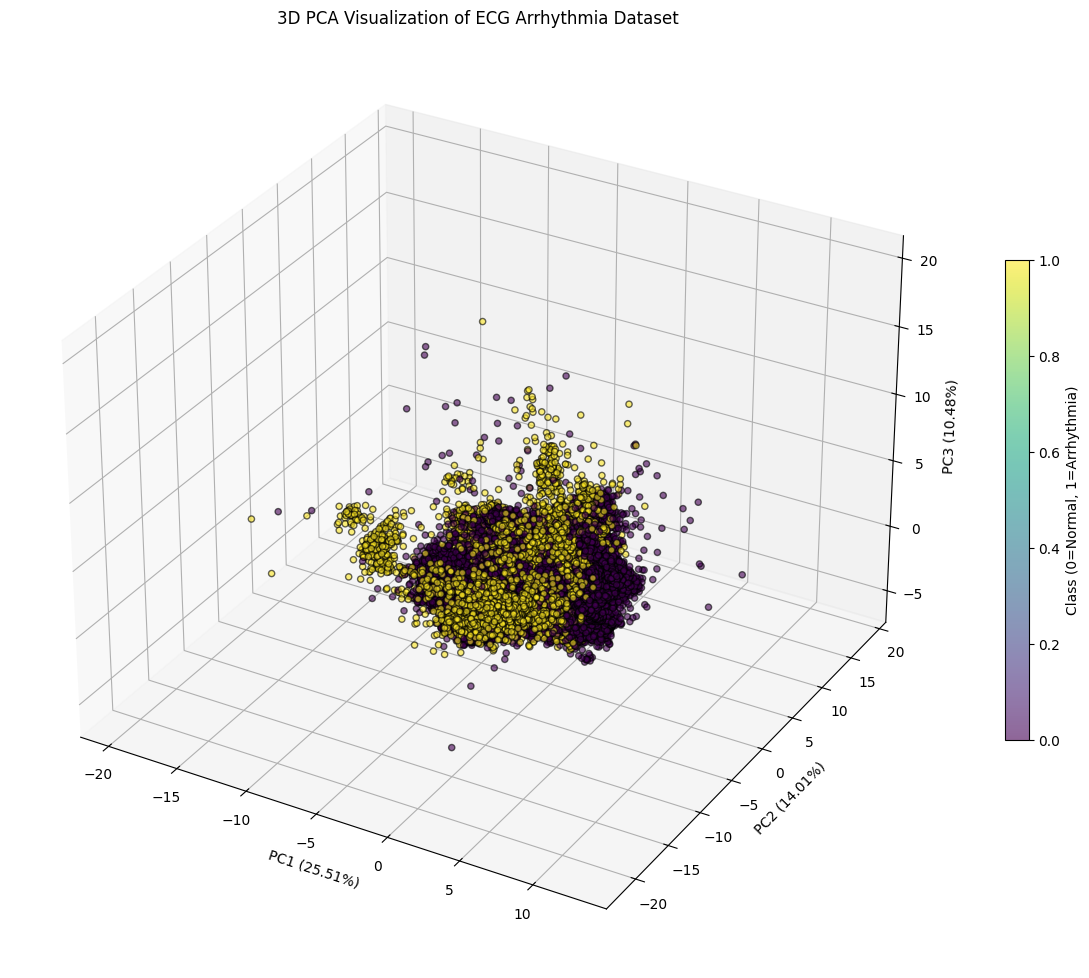

Total variance explained by 3 components: 50.00%


In [48]:
# 3D PCA Visualization
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3, random_state=42)
X_train_3d = pca_3d.fit_transform(X_train)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2],
                     c=y_train, cmap='viridis', alpha=0.6, s=20, edgecolors='k')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('3D PCA Visualization of ECG Arrhythmia Dataset')

plt.colorbar(scatter, label='Class (0=Normal, 1=Arrhythmia)', shrink=0.5)
plt.tight_layout()
plt.show()

print(f"Total variance explained by 3 components: {sum(pca_3d.explained_variance_ratio_)*100:.2f}%")

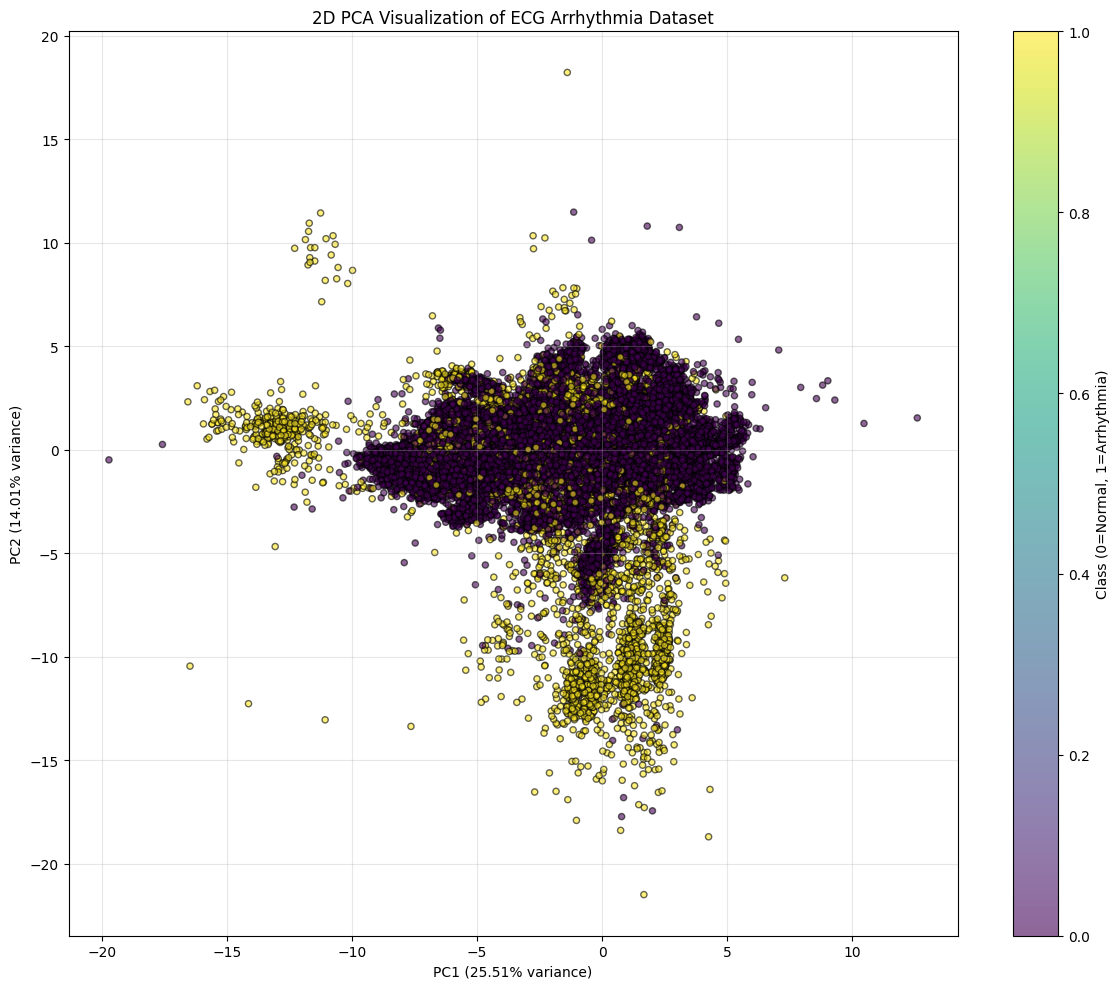

Total variance explained by 2 components: 39.52%


In [49]:
# 2D PCA Visualization
pca_2d = PCA(n_components=2, random_state=42)
X_train_2d = pca_2d.fit_transform(X_train)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                      c=y_train, cmap='viridis', alpha=0.6, s=20, edgecolors='k')
plt.colorbar(scatter, label='Class (0=Normal, 1=Arrhythmia)')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title('2D PCA Visualization of ECG Arrhythmia Dataset')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total variance explained by 2 components: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")